## Melting point with LR

In [65]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [25]:
ons_decs = pd.read_csv('D:/ML_Pyton_course/ML_Python/project//datasets/mp_ONS_decsriptors_v3.csv')
ons_decs.head(5)

,smiles,mp,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,C1(CCC1)C,-161.5050,0.127164,20.3505,15.467930,0,0,15,5,10,...,4.671883,9.414511,1.882902,0.000000,0.0,0.000000,16,1,2.784,22
1,CN(C)C,-117.0400,0.102464,19.9881,12.381137,0,0,13,4,9,...,4.544115,6.732051,1.683013,2.732051,0.0,2.732051,9,0,0.063,12
2,ClC(Cl)(Cl)Cl,-22.9875,12.849357,26.8490,10.480000,0,0,5,5,0,...,30.375082,8.500000,1.700000,9.000000,0.0,0.000000,16,0,2.864,20
3,C#C,-80.7500,0.882472,6.9650,4.853586,0,0,4,2,2,...,6.503913,3.000000,1.500000,0.000000,0.0,0.000000,1,0,0.418,2
4,C(=C(Cl)Cl)(C(Cl)(Cl)Cl)Cl,-72.9500,12.286427,46.2872,18.360000,0,0,9,9,0,...,27.312568,16.104985,1.789443,14.108974,0.0,0.000000,86,10,3.603,40


In [26]:
ons_decs.shape

(2704, 1444)

In [27]:
ons_decs.isnull().sum()

smiles        0
mp            0
ALogp2        0
AMR           0
apol          0
naAromAtom    0
nAromBond     0
nAtom         0
nHeavyAtom    0
nH            0
nB            0
nC            0
nN            0
nO            0
nS            0
nP            0
nF            0
nCl           0
nBr           0
nI            0
nX            0
ATS0m         0
ATS1m         0
ATS2m         0
ATS3m         0
ATS4m         0
ATS5m         0
ATS6m         0
ATS7m         0
ATS8m         0
             ..
MWC3          0
MWC4          0
MWC5          0
MWC6          0
MWC7          0
MWC8          0
MWC9          0
MWC10         0
TWC           0
SRW2          0
SRW3          0
SRW4          0
SRW5          0
SRW6          0
SRW7          0
SRW8          0
SRW9          0
SRW10         0
TSRW          0
MW            0
AMW           0
WTPT-1        0
WTPT-2        0
WTPT-3        0
WTPT-4        0
WTPT-5        0
WPATH         0
WPOL          0
XLogP         0
Zagreb        0
Length: 1444, dtype: int

##### vizualize with seaborn just a few features

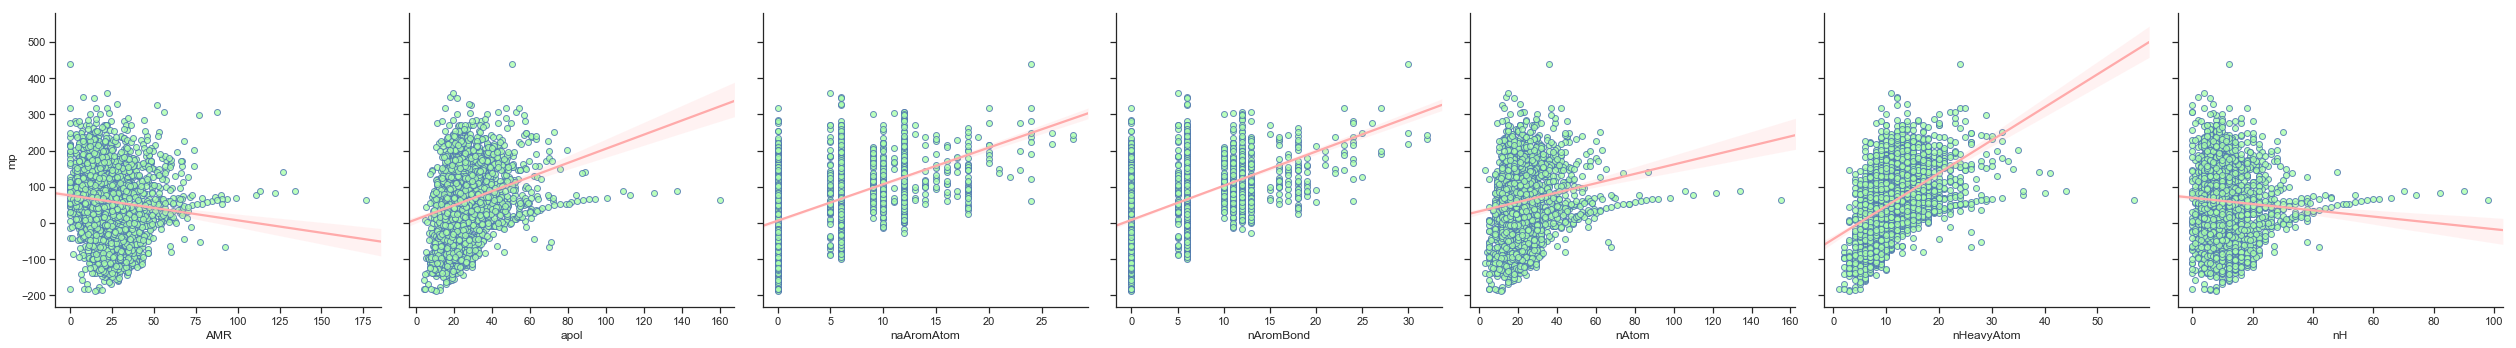

In [28]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(ons_decs, 
             x_vars=['AMR','apol','naAromAtom','nAromBond','nAtom','nHeavyAtom','nH'],              
             y_vars='mp',
#              palette=sns.hls_palette(6, l=.6, s=0.2),  ?           
             markers=["o"],
             
             plot_kws={'line_kws':{'color':'#FFAAAA'},
                       'scatter_kws':{'facecolors':'#AAFFAA'}},
             size=5, aspect=1,kind='reg')

In [64]:
ons_corr = ons_decs.corr()
ons_corr

,mp,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,...,AMW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
mp,1.000000,-0.004695,-0.110704,0.258217,0.510689,0.506999,0.160059,0.485530,-0.072970,0.014177,...,0.165005,0.499756,0.533987,0.499116,0.387763,0.394989,0.172146,0.562199,-0.016294,0.559396
ALogp2,-0.004695,1.000000,0.607901,0.564354,-0.164731,-0.161928,0.590150,0.399237,0.614056,-0.011579,...,0.067097,0.368025,-0.032695,0.024598,-0.057667,-0.073038,0.731138,0.204370,0.518295,0.261369
AMR,-0.110704,0.607901,1.000000,0.593788,-0.456067,-0.455888,0.664184,0.379985,0.735111,-0.013950,...,-0.067718,0.333247,-0.200687,0.127059,0.123881,-0.002223,0.527910,0.181531,0.289915,0.219712
apol,0.258217,0.564354,0.593788,1.000000,0.368457,0.368198,0.971701,0.905373,0.853600,-0.002436,...,-0.222717,0.896514,0.474086,0.094730,0.126871,0.088774,0.763953,0.736769,0.759800,0.813368
naAromAtom,0.510689,-0.164731,-0.456067,0.368457,1.000000,0.996735,0.203679,0.580848,-0.069366,-0.005255,...,0.044088,0.625278,0.759594,0.155137,0.055646,0.193904,0.184446,0.693567,0.380773,0.706536
nAromBond,0.506999,-0.161928,-0.455888,0.368198,0.996735,1.000000,0.205051,0.575613,-0.064024,-0.006219,...,0.037541,0.621219,0.758130,0.139336,0.041165,0.192848,0.184585,0.690162,0.388259,0.703187
nAtom,0.160059,0.590150,0.664184,0.971701,0.203679,0.205051,1.000000,0.837903,0.938036,-0.000918,...,-0.357578,0.820832,0.363854,0.037004,0.142644,0.075826,0.764735,0.630238,0.710314,0.713180
nHeavyAtom,0.485530,0.399237,0.379985,0.905373,0.580848,0.575613,0.837903,1.000000,0.596836,-0.007960,...,-0.117148,0.997469,0.614270,0.396207,0.347298,0.236216,0.712832,0.924786,0.616580,0.969249
nH,-0.072970,0.614056,0.735111,0.853600,-0.069366,-0.064024,0.938036,0.596836,1.000000,0.003704,...,-0.451269,0.573350,0.144875,-0.197152,-0.010808,-0.038506,0.671600,0.339320,0.652710,0.433016
nB,0.014177,-0.011579,-0.013950,-0.002436,-0.005255,-0.006219,-0.000918,-0.007960,0.003704,1.000000,...,-0.018846,-0.008240,-0.005057,0.019524,0.028324,-0.020641,-0.006837,-0.009379,-0.017800,-0.012411


####  TODO:    
#### need to select features with corr>0.8

In [56]:
X = ons_decs[['AMR','apol','naAromAtom','nAromBond','nAtom','nHeavyAtom','nH']]
#X = ons_decs.iloc[0: ,2: ] # error ValueError: could not convert string to float: '#NAME?'
y = ons_decs.mp

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [58]:
print(X_train.shape)
print(X_test.shape)

(2028, 7)
(676, 7)


In [59]:
lm = LinearRegression().fit(X_train,y_train)

In [60]:
print(lm.intercept_)
print(lm.coef_)

-46.100437099609906
[-0.09739987 -0.60912262 -7.34016424  7.03444008  3.41485362 12.91442576
 -9.49957214]


In [61]:
y_pred = lm.predict(X_test)
print(y_pred[:10])

[220.62809408  73.61631907  62.14488846  38.46796716  -4.06114247
  47.31527357  67.10235753  82.08082939  91.2986082  136.40213878]


In [62]:
print(lm.score(X_train, y_train))
print(lm.score(X_test, y_test))

0.4465741425727967
0.42885367986636264


In [63]:
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE:  56.524268438840004
MSE:  4980.107677390562
RMSE:  70.56987797488785
